Download gambar yang akan digunakan untuk training

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-31 08:53:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.73MB/s    in 45s     

2020-07-31 08:54:25 (6.83 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract gambar hasil download

In [8]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/images')
zip_ref.close()

Install dependency split folders untuk memisahkan data menjadi train dan validation

In [13]:
pip install split_folders

Pisah 40% gambar training untuk dijadikan sebagai validation

In [16]:
import os
import split_folders

base_dir = '/tmp/images/rockpaperscissors'
split_folders_input_dir = os.path.join(base_dir, 'rps-cv-images')
split_folders_output_dir = os.path.join(base_dir, 'data')
split_folders.ratio(split_folders_input_dir, 
                     output = split_folders_output_dir, 
                     seed = 1337, 
                     ratio = (.6, .4))

train_dir = os.path.join(split_folders_output_dir, 'train')
validation_dir = os.path.join(split_folders_output_dir, 'val')




Copying files: 0 files [00:00, ? files/s]


Copying files: 323 files [00:00, 3223.92 files/s]


Copying files: 647 files [00:00, 3226.03 files/s]


Copying files: 887 files [00:00, 2922.48 files/s]


Copying files: 1177 files [00:00, 2912.60 files/s]


Copying files: 1475 files [00:00, 2932.40 files/s]


Copying files: 1717 files [00:00, 2725.79 files/s]


Copying files: 1957 files [00:00, 2083.48 files/s]


Copying files: 2188 files [00:00, 2267.69 files/s]


Membuat image generator

In [17]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Membuat model

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

Training Model

In [21]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 45s - loss: 1.0584 - accuracy: 0.4725 - val_loss: 0.8384 - val_accuracy: 0.7188
Epoch 2/20
25/25 - 48s - loss: 0.5256 - accuracy: 0.8213 - val_loss: 0.6432 - val_accuracy: 0.8188
Epoch 3/20
25/25 - 44s - loss: 0.3209 - accuracy: 0.8875 - val_loss: 0.3317 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 45s - loss: 0.2143 - accuracy: 0.9275 - val_loss: 0.2202 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 45s - loss: 0.1994 - accuracy: 0.9250 - val_loss: 0.2134 - val_accuracy: 0.8875
Epoch 6/20
25/25 - 44s - loss: 0.2720 - accuracy: 0.9000 - val_loss: 0.1443 - val_accuracy: 0.9563
Epoch 7/20
25/25 - 44s - loss: 0.1321 - accuracy: 0.9563 - val_loss: 0.1505 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 44s - loss: 0.1472 - accuracy: 0.9488 - val_loss: 0.3135 - val_accuracy: 0.8562
Epoch 9/20
25/25 - 44s - loss: 0.1519 - accuracy: 0.9475 - val_loss: 0.1453 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 44s - loss: 0.0968 - accuracy: 0.9688 - val_loss: 0.1331 - val_accuracy: 0.9563
Epoch 11/

Percobaan Model

Saving 1VoYiUgPE6h45MLu.png to 1VoYiUgPE6h45MLu.png
1VoYiUgPE6h45MLu.png
rock


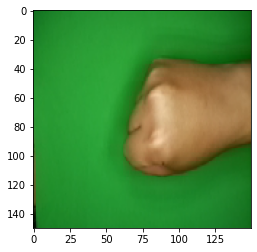

In [25]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')